# Descriptive Analysis

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Downloads/PyQuesters_Python_Hackathon/HUPA-UC Diabetes Dataset
path = "HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
modified_demographic_path = path+"DEMOGRAPHIC.csv"
patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"
print(demographic_path)

HUPA-UC Diabetes Dataset/T1DM_patient_sleep_demographics_with_race.csv


***Q1: How many participants in the dataset have diabetes, and what is their percentage?***  
*Reasoning:*
*Since understanding the prevalence of diabetes is key to this analysis, examining the proportion of 
participants with the condition helps contextualize the population.*

In [102]:

# Load the merged patient and demographic dataset
df = pd.read_csv(patients_demographic_path)

# ---------------------------
# Step 1: Unique participants by gender
# ---------------------------
gender_counts = df.groupby('patient_id')['gender'].first().value_counts()
gender_percent = gender_counts / gender_counts.sum() * 100

print("Number of participants by gender:")
print(gender_counts)
print("\nPercentage of participants by gender:")
print(gender_percent.round(2))

# Gender comparison
if gender_counts.get('Female', 0) > gender_counts.get('Male', 0):
    print("\nFemale participants are higher in number.")
elif gender_counts.get('Male', 0) > gender_counts.get('Female', 0):
    print("\nMale participants are higher in number.")
else:
    print("\nNumber of male and female participants are equal.")

# ---------------------------
# Step 2: Identify diabetic participants
# ---------------------------
# Example threshold: max glucose >= 126 mg/dL considered diabetic
diabetic_patients = df.groupby('patient_id')['glucose'].max()
diabetic_patients = diabetic_patients[diabetic_patients >= 126]

print("\nNumber of diabetic participants:", len(diabetic_patients))
print("Percentage of total participants:", 
      round(len(diabetic_patients)/df['patient_id'].nunique()*100, 2))

# ---------------------------
# Step 3: Gender-wise distribution of diabetic participants
# ---------------------------
# Merge with gender information
gender_info = df[['patient_id', 'gender']].drop_duplicates()
diabetic_gender = gender_info[gender_info['patient_id'].isin(diabetic_patients.index)]
diabetic_gender_counts = diabetic_gender['gender'].value_counts()
diabetic_gender_percent = diabetic_gender_counts / diabetic_gender_counts.sum() * 100

print("\nDiabetic participants by gender:")
print(diabetic_gender_counts)
print("\nPercentage of diabetic participants by gender:")
print(diabetic_gender_percent.round(2))



Number of participants by gender:
gender
Male      16
Female     9
Name: count, dtype: int64

Percentage of participants by gender:
gender
Male      64.0
Female    36.0
Name: count, dtype: float64

Male participants are higher in number.

Number of diabetic participants: 25
Percentage of total participants: 100.0

Diabetic participants by gender:
gender
Male      16
Female     9
Name: count, dtype: int64

Percentage of diabetic participants by gender:
gender
Male      64.0
Female    36.0
Name: count, dtype: float64


***Q2: How does heart rate correlate with physical activity (steps) across patients?***    
*Reasoning: Understanding the relationship between heart rate and physical activity helps assess cardiovascular fitness and activity patterns in diabetes patients, which is crucial for comprehensive health monitoring.*

In [104]:
print("HEART RATE vs PHYSICAL ACTIVITY ANALYSIS")
print("=" * 50)

# Step 1: Load and examine the data
print(f"Total records in dataset: {len(df):,}")
print(f"Heart rate range: {df['heart_rate'].min():.0f} - {df['heart_rate'].max():.0f} bpm")
print(f"Steps range: {df['steps'].min():.0f} - {df['steps'].max():.0f} steps")

# Step 2: Filter out inactive periods (zero steps) and Create a subset with only active periods (steps > 0)
active_data = df[df['steps'] > 0].copy()
print(f"Records with activity (steps > 0): {len(active_data):,}")
print(f"Records with no activity (steps = 0): {len(df) - len(active_data):,}")
print(f"Percentage of time patients were active: {len(active_data)/len(df)*100:.1f}%")

# Step 3: Calculate the correlation between heart rate and steps
print("\nCalculating correlation between heart rate and steps")
correlation = active_data['heart_rate'].corr(active_data['steps'])

# Interpret the result
if correlation > 0.7:
    strength = "Strong positive"
elif correlation > 0.3:
    strength = "Moderate positive"
elif correlation > 0.1:
    strength = "Weak positive"
elif correlation > -0.1:
    strength = "Very weak"
elif correlation > -0.3:
    strength = "Weak negative"
else:
    strength = "Moderate to strong negative"

print(f"Result: {strength} correlation")

# Step 4: Compare heart rate during activity vs rest
print("\nComparing heart rate during activity vs rest")

hr_active = active_data['heart_rate'].mean()
hr_rest = df[df['steps'] == 0]['heart_rate'].mean()
hr_difference = hr_active - hr_rest

print(f" - Average heart rate during activity: {hr_active:.1f} bpm")
print(f" - Average heart rate during rest: {hr_rest:.1f} bpm")
print(f" - Heart rate increase during activity: {hr_difference:.1f} bpm")

if hr_difference > 20:
    print("Result: Significant heart rate response to activity (good cardiovascular response)")
elif hr_difference > 10:
    print("Result: Moderate heart rate response to activity")
else:
    print("Result: Minimal heart rate response to activity (may indicate fitness or medication effects)")


HEART RATE vs PHYSICAL ACTIVITY ANALYSIS
Total records in dataset: 309,392
Heart rate range: 32 - 196 bpm
Steps range: 0 - 842 steps
Records with activity (steps > 0): 90,042
Records with no activity (steps = 0): 219,350
Percentage of time patients were active: 29.1%

Calculating correlation between heart rate and steps
Result: Moderate positive correlation

Comparing heart rate during activity vs rest
 - Average heart rate during activity: 88.5 bpm
 - Average heart rate during rest: 72.2 bpm
 - Heart rate increase during activity: 16.3 bpm
Result: Moderate heart rate response to activity


***Q3: What is the distribution of calorie expenditure in the dataset?***    
*Reasoning: Calorie expenditure patterns reveal daily activity rhythms and metabolic patterns, helping understand energy balance in diabetes patients and optimize meal timing and insulin delivery.*



Distribution of Calorie Expenditure
------------------------------------------------------------
count    309392.00
mean          8.81
std           6.93
min           0.00
25%           5.85
50%           6.28
75%           9.19
max         106.35
Name: calories, dtype: float64


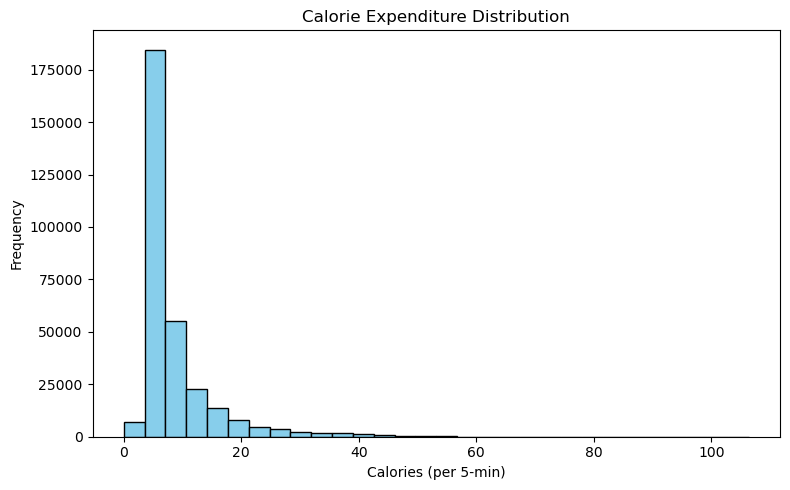

In [109]:
print("\n\nDistribution of Calorie Expenditure")
print("-" * 60)

# Ensure time column is datetime (optional if not needed for this)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Basic stats
print(df['calories'].describe().round(2))

# Plot distribution
plt.figure(figsize=(8,5))
plt.hist(df['calories'], bins=30, color='skyblue', edgecolor='black')
plt.title('Calorie Expenditure Distribution')
plt.xlabel('Calories (per 5-min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


 ***Q4: How does average glucose vary across age groups?***  
*Reasoning: Blood sugar levels can change with age. Older people may have different patterns compared to younger ones. Finding these differences helps identify which age groups may need extra support or care.*


  age_group     glucose
0     11-20  143.677664
1     21-30  156.729783
2     31-40  161.867671
3     41-50  138.105416
4     51-60  132.712928
5     61-70  147.541359
6     71-80  133.053330


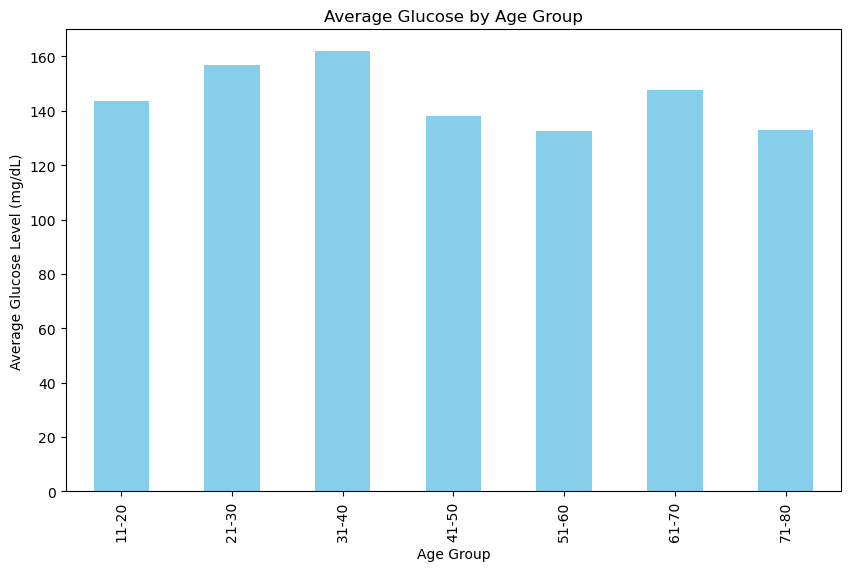

In [111]:
#Create age groups 
age_bins = [10,20,30,40,50,60,70,80]
age_labels = ['11-20','21-30','31-40','41-50','51-60','61-70','71-80']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

#Calculate average glucose by age group
avg_glucose_by_age = df.groupby('age_group', observed=False)['glucose'].mean().reset_index()
print(avg_glucose_by_age)

#Plot the results(bar chart)
avg_glucose_by_age.plot(kind='bar', x='age_group', y='glucose', color='skyblue', legend=False, figsize=(10,6))
plt.title("Average Glucose by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Glucose Level (mg/dL)")
plt.show()


***Q5: What is the impact of carbohydrate intake on glucose spikes?***  
*Reasoning: Higher carbohydrate intake usually increases blood sugar levels. This analysis helps to see how glucose changes with carb intake.*

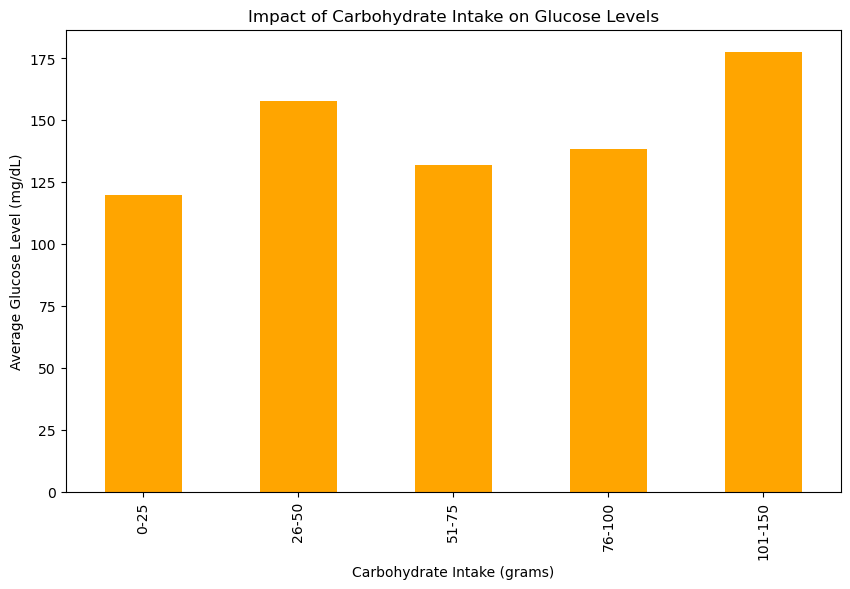

In [113]:
# Create carb intake bins
carb_bins = [0, 25, 50, 75, 100, 150]  
carb_labels = ['0-25', '26-50', '51-75', '76-100', '101-150', '151-200']

#  Create carb intake bins
carb_bins = [0, 25, 50, 75, 100, 150]  
carb_labels = ['0-25', '26-50', '51-75', '76-100', '101-150']

df['carb_group'] = pd.cut(df['carb_input'], bins=carb_bins, labels=carb_labels)

# Calculate average glucose by carb group
avg_glucose_by_carb = df.groupby('carb_group', observed=False)['glucose'].mean().reset_index()

# Plot
avg_glucose_by_carb.plot(
    kind='bar',
    x='carb_group',
    y='glucose',
    color='orange',
    legend=False,
    figsize=(10,6)
)

plt.title("Impact of Carbohydrate Intake on Glucose Levels")
plt.xlabel("Carbohydrate Intake (grams)")
plt.ylabel("Average Glucose Level (mg/dL)")
plt.show()

***Q6: How does glucose vary by sleep quality?***  
*Reasoning: Poor sleep quality is often linked to higher blood sugar. By comparing glucose levels across different sleep quality groups, we can see if sleep problems affect blood sugar control.*

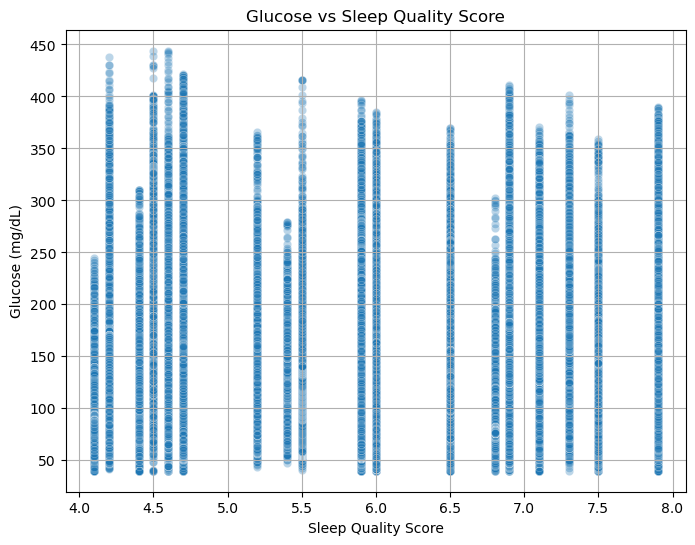

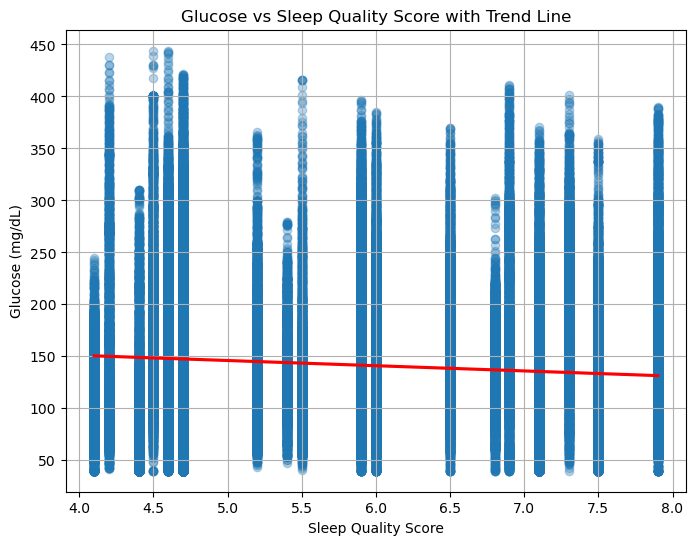

In [119]:
# Scatter plot: glucose vs sleep quality
plt.figure(figsize=(8,6))
sns.scatterplot(x='sleep_quality_score', y='glucose', data=df, alpha=0.3)
plt.title('Glucose vs Sleep Quality Score')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Glucose (mg/dL)')
plt.grid(True)
plt.show()

# Regression line to show trend
plt.figure(figsize=(8,6))
sns.regplot(x='sleep_quality_score', y='glucose', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Glucose vs Sleep Quality Score with Trend Line')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Glucose (mg/dL)')
plt.grid(True)
plt.show()

**Q7 : Compare overnight and daytime glucose levels across patients per day**  
*Reasoning: Overnight (midnight–5 AM) glucose reflects basal insulin and fasting state. 
             and Daytime glucose is influenced by meals,activity,stress and bolus insulin.
             Comparing these two periods helps clinical assess whether insulin delivery(basal/bolus) or                          lifestyle modificiations like diet,exercise are effective*

In [128]:
# Create patients_df dataframe by reading ALLPATIENTS.csv file
patients_df = pd.read_csv(all_patients_path, parse_dates=["time"])
patients_df.columns

Index(['time', 'glucose', 'calories', 'heart_rate', 'steps', 'basal_rate',
       'bolus_volume_delivered', 'carb_input', 'patient_id'],
      dtype='object')

In [130]:
# Steps:
# Create seperate dataframes for daytime and overnight dataset
# daytime_df: This dataframe contains avg glucose values taken during the daytime per patient per day.
# columns are:
#patient id: Patient Id
#date part from time column: This column used to join the overnight dataset to get avgerage of glucose values recorded during overnight on that day 
#is_daytime: This column identifies the at what day part the glucose reading is recorded
#daytime_avg_glucose: This column has a avg glucose value for all records in daytime period on a single day

#------------------------------------------------------------
#Adding extra date column while grouping for daytime
#Extracting all glucose values for the 
# daytime[from 6am till 12am] grouping by patient_id and date
#-------------------------------------------------------------
daytime_df = patients_df.assign(date=patients_df['time'].dt.date,is_daytime = patients_df['time'].dt.hour.between(6,23)).groupby(['patient_id','date','is_daytime'])['glucose'].mean().reset_index()
#------------------------------------------------------------
# Delete all rows having is_daytime == False ie records other 
# than daytime
#------------------------------------------------------------
daytime_df=daytime_df[daytime_df['is_daytime']==True]
#------------------------------------------------------------
# rename the glucose column with daytime_avg_glucose
# renaming to clean join with the overnight dataframe
#------------------------------------------------------------
daytime_df=daytime_df.rename(columns={'glucose':'daytime_avg_glucose'})
#------------------------------------------------------------
# Number of patients having records during daytime
#------------------------------------------------------------
print('Total number of patients having records during daytime: ' , daytime_df['patient_id'].nunique())
#------------------------------------------------------------
# Number of days having records during midnight
#------------------------------------------------------------
print('Total number of days on which glucose has recorded during daytime:', daytime_df['date'].nunique())

#------------------------------------------------------------
# Adding extra date column while grouping for daytime
# Extracting all glucose values for the daytime[from midnight till 6am] grouping by patient_id and date
#------------------------------------------------------------
overnight_df= patients_df.assign(date=patients_df['time'].dt.date,is_overnight = patients_df['time'].dt.hour.between(0,5)).groupby(['patient_id','date','is_overnight'])['glucose'].mean().reset_index()
#overnight_df
#------------------------------------------------------------
# Delete all rows having is_daytime == False ie records other than daytime
#------------------------------------------------------------
overnight_df=overnight_df[overnight_df['is_overnight']==True]
#------------------------------------------------------------
# rename the glucose column with daytime_avg_glucose
# renaming to clean join with the overnight dataframe
#------------------------------------------------------------
overnight_df = overnight_df.rename(columns={'glucose':'overnight_avg_glucose'})
#overnight_df.count()
#overnight_df
#------------------------------------------------------------
# Number of patients having records during overnight
#------------------------------------------------------------
print('Total number of patients having records during overnight: ' , overnight_df['patient_id'].nunique())
#------------------------------------------------------------
# Number of days having records during midnight
#------------------------------------------------------------
print('Total number of days on which glucose has recorded during overnight:', overnight_df['date'].nunique())

#------------------------------------------------------------
# Join two df on patient_id and date 
#------------------------------------------------------------
result_df = pd.merge(daytime_df, overnight_df, on = ['patient_id','date'], how="inner") #,suffixes=('_daytime_avg_','_overnight_avg_'))
#------------------------------------------------------------
# Rounding avg glucose values to 1
#------------------------------------------------------------
result_df = result_df.round({
    'daytime_avg_glucose':1,
    'overnight_avg_glucose':1
})
result_df['date'].nunique()
result_df['patient_id'].nunique()
#------------------------------------------------------------
# Number of patients having records during overnight and daytime on the same day
#------------------------------------------------------------
print('Total number of patients having records during overnight: ' , result_df['patient_id'].nunique())
#------------------------------------------------------------
# Number of days having records during midnight and daytime
#------------------------------------------------------------
print('Total number of days on which glucose has recorded during overnight:', result_df['date'].nunique())
#result_df.columns
#------------------------------------------------------------
# Number of records during overnight and daytime on the same day for a patient
#------------------------------------------------------------
print('Total number records during overnight and daytime on the same day for a patient:', len(result_df))

result_df[['patient_id','date','daytime_avg_glucose','overnight_avg_glucose']]


#------------------------------------------------------------
# Find the patients having less difference between 
# DayTime and Overnight average glucose values
#------------------------------------------------------------
result_df['diff'] = (result_df['daytime_avg_glucose'] - result_df['overnight_avg_glucose']).abs()
#------------------------------------------------------------
# Patients having the minimum difference in daytime and overnight avg glucose reading per day
#------------------------------------------------------------
min_diff_index = result_df['diff'].idxmin()
print('------------------------------------------------------------------------------------------')
print('Patient having the minimum difference in daytime and overnight avg glucose reading day:')
print(result_df.loc[min_diff_index,['patient_id','date','daytime_avg_glucose','overnight_avg_glucose']])
print('------------------------------------------------------------------------------------------')
#------------------------------------------------------------
# Patients having the maximum difference in daytime and overnight avg glucose reading per day
#------------------------------------------------------------
max_diff_index = result_df['diff'].idxmax()
print('Patient having the maximum difference in daytime and overnight avg glucose reading day:')
print(result_df.loc[max_diff_index,['patient_id','date','daytime_avg_glucose','overnight_avg_glucose']])

#------------------------------------------------------------
# Patients getting spice in glucose values between 20 -50 units in daytime and overnight avg glucose reading per day
#------------------------------------------------------------
#max_diff_index = result_df['diff'].idxmax()
#print('Patient having the maximum difference in daytime and overnight avg glucose reading day:')
#print(result_df.loc[max_diff_index,['patient_id','date','daytime_avg_glucose','overnight_avg_glucose']])

#------------------------------------------------------------
# Number of Patients having lower overnight reading than daytime reading 
# Generally these paitents are non-diabetic or well-controlled diabetic patients
#------------------------------------------------------------
rows = result_df.loc[result_df['daytime_avg_glucose']>= result_df['overnight_avg_glucose'],
['patient_id','date','overnight_avg_glucose', 'daytime_avg_glucose']]
print('------------------------------------------------------------------------------------------')
print('Number of Patients with overnight avgerage glucose lower than \nor equal to the daytime glucose reading per day: ',len(rows))
print('Generally these paitents are non-diabetic or well-controlled diabetic patients')
print('------------------------------------------------------------------------------------------')
# rows.reset_index(drop=True)
#result_df
#------------------------------------------------------------
# Number of Patients with overnight avgerage glucose greater than 
# the daytime avg glucose reading by 50 mg/dLper day
# Difference more than 50mg/dL indicates risk of Hypoglycemia overnight
#------------------------------------------------------------
rows = result_df.loc[((result_df['daytime_avg_glucose']+50) < (result_df['overnight_avg_glucose'])),
['patient_id','date','overnight_avg_glucose', 'daytime_avg_glucose']]
print('Number of Patients with overnight avgerage glucose greater than \nthe daytime avg glucose reading by 50 mg/dLper day: ',len(rows))
print('Difference more than 50mg/dL indicates risk of Hypoglycemia overnight')
print('------------------------------------------------------------------------------------------')

#------------------------------------------------------------
# Number of patients whose overnight average glucose is greater than daytime glucose 
# by more than 20 mg/dL but less than 50 mg/dL per day.
# A difference of ~20–50 mg/dL is often reasonable;
#------------------------------------------------------------

rows = result_df.loc[(
        (result_df['overnight_avg_glucose']>result_df['daytime_avg_glucose'])&
        (result_df['overnight_avg_glucose'] - result_df['daytime_avg_glucose'] >=20 )&
        (result_df['overnight_avg_glucose'] - result_df['daytime_avg_glucose'] <=50 )),
        ['patient_id','date','overnight_avg_glucose', 'daytime_avg_glucose']]
print('Number of patients whose overnight average glucose is greater than daytime glucose \nby more than 20 mg/dL but less than 50 mg/dL per day: ',len(rows))
print('A difference of ~20–50 mg/dL is often reasonable')
print('------------------------------------------------------------------------------------------')
#------------------------------------------------------------
# Number of patients whose overnight average glucose is greater than daytime glucose 
# by less than 20 mg/dL per day
# A difference less than 20mg/dL is reasonable
#------------------------------------------------------------

rows = result_df.loc[(
        (result_df['overnight_avg_glucose']>result_df['daytime_avg_glucose'])&
        (result_df['overnight_avg_glucose'] - result_df['daytime_avg_glucose'] <20 )),
        ['patient_id','date','overnight_avg_glucose', 'daytime_avg_glucose']]
print('Number of patients whose overnight average glucose is greater than daytime glucose \nby less than 20 mg/dL per day: ',len(rows))
print('A difference less than 20mg/dL is reasonable')
print('\n**********Exact values can vary based on age, medications, and clinical recommendations.**********')

Total number of patients having records during daytime:  25
Total number of days on which glucose has recorded during daytime: 800
Total number of patients having records during overnight:  25
Total number of days on which glucose has recorded during overnight: 792
Total number of patients having records during overnight:  25
Total number of days on which glucose has recorded during overnight: 792
Total number records during overnight and daytime on the same day for a patient: 1071
------------------------------------------------------------------------------------------
Patient having the minimum difference in daytime and overnight avg glucose reading day:
patient_id                HUPA0028P
date                     2022-04-22
daytime_avg_glucose           106.1
overnight_avg_glucose         106.1
Name: 1044, dtype: object
------------------------------------------------------------------------------------------
Patient having the maximum difference in daytime and overnight avg glucos

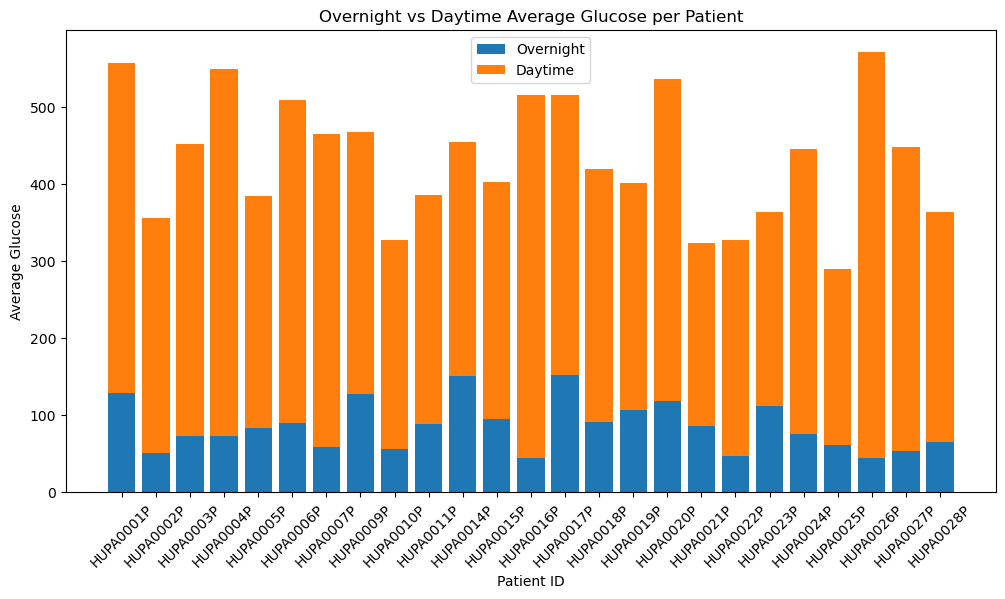

In [132]:

#Ploting grpah 
#It is taking a min and max values 
plt.figure(figsize=(12,6))
plt.bar(result_df['patient_id'], result_df['overnight_avg_glucose'], label='Overnight')
plt.bar(result_df['patient_id'], result_df['daytime_avg_glucose'], bottom=result_df['overnight_avg_glucose'], label='Daytime')
plt.xlabel("Patient ID")
plt.ylabel("Average Glucose")
plt.title("Overnight vs Daytime Average Glucose per Patient")
plt.xticks(rotation=45)
plt.legend()
plt.show()